Data Preprocessing + Exploration 

In [2]:
#for data wrangling 
import pandas as pd 
import numpy as np 
import re 
import string

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#read the data frame 
df = pd.read_csv('cyber.csv', delimiter=',')
print(df)
print(df.shape)


                                              tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]
(47692, 2)


In [3]:
#check if there's any missing values 
df.isnull().sum()

#no missing values 

tweet_text            0
cyberbullying_type    0
dtype: int64

In [4]:
#check if there are duplicates for tweet_text
df["tweet_text"].duplicated().sum()

1675

Although there are duplicates, the duplicates will be kept to prevent imbalanced

In [5]:
#determine the distribution of the values for each type of cyberbullying
type_count = df['cyberbullying_type'].value_counts()
print(type_count)


religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64


([<matplotlib.patches.Wedge at 0x147dcdbb0>,
 [Text(0.9508355784612095, 0.553092851818153, 'religion'),
  Text(-0.010289112228893867, 1.0999518781153752, 'age'),
  Text(-0.960133030043501, 0.5367909878337057, 'gender'),
  Text(-0.9435783150757331, -0.5653847922599623, 'ethnicity'),
  Text(0.018476310761988458, -1.0998448190270418, 'not_cyberbullying'),
  Text(0.9571480988601195, -0.5420954868364604, 'other_cyberbullying')],
 [Text(0.5186375882515687, 0.30168701008262894, '16.8%'),
  Text(-0.005612243033942108, 0.5999737516992956, '16.8%'),
  Text(-0.5237089254782733, 0.29279508427293033, '16.7%'),
  Text(-0.5146790809503998, -0.3083917048690703, '16.7%'),
  Text(0.010077987688357338, -0.5999153558329319, '16.7%'),
  Text(0.5220807811964288, -0.295688447365342, '16.4%')])

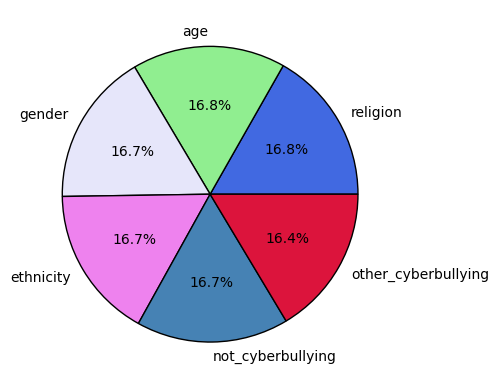

In [6]:
slices = type_count.values
#offset the second slice 
color = ['royalblue','lightgreen','lavender','violet','steelblue','crimson']
explode = [0,0.1,0]
plt.pie(slices,labels=type_count.index,colors=color, autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})

The data is split evenly into ~17 percent --> valid for multicalss classification 

In [7]:
#remove links/pics/punc and etc for the NLP model 
string.punctuation

#create a function to remove the patterns  
def remove_pattern(text):
    clean_txt = re.sub(r'@\S+|http\S+|pic.\S+|\d+|[^a-zA-Z\']|\s+[a-zA-Z]\s+', ' ', text)
    return clean_txt

df['clean_tweet'] = df['tweet_text'].apply(lambda x: remove_pattern(x))
df.head()


tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                         clean_tweet  
0  In other words  katandandre  your food was cra...  
1  Why is  aussietv so white   MKR  theblock  ImA...  
2       a classy whore  Or more red velvet cupcakes   
3    meh   P  thanks for the heads up  but not to...  
4    This is an ISIS account pretending to be a K...

In [8]:
#tokenize the strings by splitting into individual words 
def to_tokenize(text):
    sections = re.split("\W",text)
    return sections 

df['clean_tweet_token'] = df['clean_tweet'].apply(lambda x: to_tokenize(x.lower()) )
df.head()

tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                         clean_tweet  \
0  In other words  katandandre  your food was cra...   
1  Why is  aussietv so white   MKR  theblock  ImA...   
2       a classy whore  Or more red velvet cupcakes    
3    meh   P  thanks for the heads up  but not to...   
4    This is an ISIS account pretending to be a K...   

                                   clean_tweet_token  
0  [in, other, words, , katandandre, , your, food...  
1  [why, is, , aussietv, so, white, , , mkr, , th...  
2  [, , a, classy, whore, , or, more, red, velvet...  
3  [, , meh, , , p, , thanks, for, the, heads, up...  
4  [, , this, is, an, isis, account, pretending, ...

In [9]:
#remove stop words 

#import the libraries 
import nltk 
nltk.download('stopwords')

#look at the type of stopwords there is 
stopword = nltk.corpus.stopwords.words('english')
print(stopword)

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text 

df['clean_tweet_stopword'] = df['clean_tweet_token'].apply(lambda x: remove_stopwords(x))
df.head()


[nltk_data] Downloading package stopwords to /Users/jc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                         clean_tweet  \
0  In other words  katandandre  your food was cra...   
1  Why is  aussietv so white   MKR  theblock  ImA...   
2       a classy whore  Or more red velvet cupcakes    
3    meh   P  thanks for the heads up  but not to...   
4    This is an ISIS account pretending to be a K...   

                                   clean_tweet_token  \
0  [in, other, words, , katandandre, , your, food...   
1  [why, is, , aussietv, so, white, , , mkr, , th...   
2  [, , a, classy, whore, , or, more, red, velvet...   
3  [, , meh, , , p, , thanks, for, the, heads, up...   
4  [, , this, is, an, isis, account, pretending, ...   

                                clean_tweet_stopword  
0  [words, , katandandre, , food, crapilicious, ,...  
1  [, aussietv, white, , , mkr, , theblock, , ima...  
2     [, , classy, whore, , red, velvet, cupcakes, ]  
3  [, , meh, , , p, , thanks, heads, , concerned,...  
4  [, , isis, account, pretending, kurdish, accou...

In [10]:
#identify the words with their part of speech
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

df['tweet_speech'] = df['clean_tweet_stopword'].apply(nltk.tag.pos_tag)
df.head()


[nltk_data] Downloading package punkt to /Users/jc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jc/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                         clean_tweet  \
0  In other words  katandandre  your food was cra...   
1  Why is  aussietv so white   MKR  theblock  ImA...   
2       a classy whore  Or more red velvet cupcakes    
3    meh   P  thanks for the heads up  but not to...   
4    This is an ISIS account pretending to be a K...   

                                   clean_tweet_token  \
0  [in, other, words, , katandandre, , your, food...   
1  [why, is, , aussietv, so, white, , , mkr, , th...   
2  [, , a, classy, whore, , or, more, red, velvet...   
3  [, , meh, , , p, , thanks, for, the, heads, up...   
4  [, , this, is, an, isis, account, pretending, ...   

                                clean_tweet_stopword  \
0  [words, , katandandre, , food, crapilicious, ,...   
1  [, aussietv, white, , , mkr, , theblock, , ima...   
2     [, , classy, whore, , red, velvet, cupcakes, ]   
3  [, , meh, , , p, , thanks, heads, , concerned,...   
4  [, , isis, account, pretending, kurdish, accou...   

                                        tweet_speech  
0  [(words, NNS), (, VBP), (katandandre, JJ), (, ...  
1  [(, JJ), (aussietv, JJ), (white, JJ), (, NN), ...  
2  [(, JJ), (, NNP), (classy, NN), (whore, NN), (...  
3  [(, JJ), (, NNP), (meh, NN), (, NNP), (, NNP),...  
4  [(, JJ), (, JJ), (isis, NN), (account, NN), (p...

In [11]:
#create a function to classify the words into verb, noun, etc 
from nltk.corpus import wordnet
nltk.download('wordnet')

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

df['tweet_wordnet'] = df['tweet_speech'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

[nltk_data] Downloading package wordnet to /Users/jc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                         clean_tweet  \
0  In other words  katandandre  your food was cra...   
1  Why is  aussietv so white   MKR  theblock  ImA...   
2       a classy whore  Or more red velvet cupcakes    
3    meh   P  thanks for the heads up  but not to...   
4    This is an ISIS account pretending to be a K...   

                                   clean_tweet_token  \
0  [in, other, words, , katandandre, , your, food...   
1  [why, is, , aussietv, so, white, , , mkr, , th...   
2  [, , a, classy, whore, , or, more, red, velvet...   
3  [, , meh, , , p, , thanks, for, the, heads, up...   
4  [, , this, is, an, isis, account, pretending, ...   

                                clean_tweet_stopword  \
0  [words, , katandandre, , food, crapilicious, ,...   
1  [, aussietv, white, , , mkr, , theblock, , ima...   
2     [, , classy, whore, , red, velvet, cupcakes, ]   
3  [, , meh, , , p, , thanks, heads, , concerned,...   
4  [, , isis, account, pretending, kurdish, accou...   

                                        tweet_speech  \
0  [(words, NNS), (, VBP), (katandandre, JJ), (, ...   
1  [(, JJ), (aussietv, JJ), (white, JJ), (, NN), ...   
2  [(, JJ), (, NNP), (classy, NN), (whore, NN), (...   
3  [(, JJ), (, NNP), (meh, NN), (, NNP), (, NNP),...   
4  [(, JJ), (, JJ), (isis, NN), (account, NN), (p...   

                                       tweet_wordnet  
0  [(words, n), (, v), (katandandre, a), (, n), (...  
1  [(, a), (aussietv, a), (white, a), (, n), (, n...  
2  [(, a), (, n), (classy, n), (whore, n), (, n),...  
3  [(, a), (, n), (meh, n), (, n), (, n), (p, n),...  
4  [(, a), (, a), (isis, n), (account, n), (prete...

In [12]:
#lemmatize the word for
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()
df['tweet_lemantize'] = df['tweet_wordnet'].apply(lambda x:[lem.lemmatize(word, tag) for word, tag in x])
df.head()

tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                         clean_tweet  \
0  In other words  katandandre  your food was cra...   
1  Why is  aussietv so white   MKR  theblock  ImA...   
2       a classy whore  Or more red velvet cupcakes    
3    meh   P  thanks for the heads up  but not to...   
4    This is an ISIS account pretending to be a K...   

                                   clean_tweet_token  \
0  [in, other, words, , katandandre, , your, food...   
1  [why, is, , aussietv, so, white, , , mkr, , th...   
2  [, , a, classy, whore, , or, more, red, velvet...   
3  [, , meh, , , p, , thanks, for, the, heads, up...   
4  [, , this, is, an, isis, account, pretending, ...   

                                clean_tweet_stopword  \
0  [words, , katandandre, , food, crapilicious, ,...   
1  [, aussietv, white, , , mkr, , theblock, , ima...   
2     [, , classy, whore, , red, velvet, cupcakes, ]   
3  [, , meh, , , p, , thanks, heads, , concerned,...   
4  [, , isis, account, pretending, kurdish, accou...   

                                        tweet_speech  \
0  [(words, NNS), (, VBP), (katandandre, JJ), (, ...   
1  [(, JJ), (aussietv, JJ), (white, JJ), (, NN), ...   
2  [(, JJ), (, NNP), (classy, NN), (whore, NN), (...   
3  [(, JJ), (, NNP), (meh, NN), (, NNP), (, NNP),...   
4  [(, JJ), (, JJ), (isis, NN), (account, NN), (p...   

                                       tweet_wordnet  \
0  [(words, n), (, v), (katandandre, a), (, n), (...   
1  [(, a), (aussietv, a), (white, a), (, n), (, n...   
2  [(, a), (, n), (classy, n), (whore, n), (, n),...   
3  [(, a), (, n), (meh, n), (, n), (, n), (p, n),...   
4  [(, a), (, a), (isis, n), (account, n), (prete...   

                                     tweet_lemantize  
0  [word, , katandandre, , food, crapilicious, , ...  
1  [, aussietv, white, , , mkr, , theblock, , ima...  
2      [, , classy, whore, , red, velvet, cupcake, ]  
3  [, , meh, , , p, , thanks, head, , concern, an...  
4  [, , isi, account, pretend, kurdish, account, ...

In [13]:
#transfer the lemantize column into strings for sentiment analysis 
df['lemma_str'] = [' '.join(map(str,l)) for l in df['tweet_lemantize']]
df.head()


tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                         clean_tweet  \
0  In other words  katandandre  your food was cra...   
1  Why is  aussietv so white   MKR  theblock  ImA...   
2       a classy whore  Or more red velvet cupcakes    
3    meh   P  thanks for the heads up  but not to...   
4    This is an ISIS account pretending to be a K...   

                                   clean_tweet_token  \
0  [in, other, words, , katandandre, , your, food...   
1  [why, is, , aussietv, so, white, , , mkr, , th...   
2  [, , a, classy, whore, , or, more, red, velvet...   
3  [, , meh, , , p, , thanks, for, the, heads, up...   
4  [, , this, is, an, isis, account, pretending, ...   

                                clean_tweet_stopword  \
0  [words, , katandandre, , food, crapilicious, ,...   
1  [, aussietv, white, , , mkr, , theblock, , ima...   
2     [, , classy, whore, , red, velvet, cupcakes, ]   
3  [, , meh, , , p, , thanks, heads, , concerned,...   
4  [, , isis, account, pretending, kurdish, accou...   

                                        tweet_speech  \
0  [(words, NNS), (, VBP), (katandandre, JJ), (, ...   
1  [(, JJ), (aussietv, JJ), (white, JJ), (, NN), ...   
2  [(, JJ), (, NNP), (classy, NN), (whore, NN), (...   
3  [(, JJ), (, NNP), (meh, NN), (, NNP), (, NNP),...   
4  [(, JJ), (, JJ), (isis, NN), (account, NN), (p...   

                                       tweet_wordnet  \
0  [(words, n), (, v), (katandandre, a), (, n), (...   
1  [(, a), (aussietv, a), (white, a), (, n), (, n...   
2  [(, a), (, n), (classy, n), (whore, n), (, n),...   
3  [(, a), (, n), (meh, n), (, n), (, n), (p, n),...   
4  [(, a), (, a), (isis, n), (account, n), (prete...   

                                     tweet_lemantize  \
0  [word, , katandandre, , food, crapilicious, , ...   
1  [, aussietv, white, , , mkr, , theblock, , ima...   
2      [, , classy, whore, , red, velvet, cupcake, ]   
3  [, , meh, , , p, , thanks, head, , concern, an...   
4  [, , isi, account, pretend, kurdish, account, ...   

                                           lemma_str  
0         word  katandandre  food crapilicious   mkr  
1   aussietv white   mkr  theblock  imacelebritya...  
2                  classy whore  red velvet cupcake   
3    meh   p  thanks head  concern another angry ...  
4    isi account pretend kurdish account   like i...

In [14]:
#obtain the sentiment of the text
from textblob import TextBlob
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()


tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                         clean_tweet  \
0  In other words  katandandre  your food was cra...   
1  Why is  aussietv so white   MKR  theblock  ImA...   
2       a classy whore  Or more red velvet cupcakes    
3    meh   P  thanks for the heads up  but not to...   
4    This is an ISIS account pretending to be a K...   

                                   clean_tweet_token  \
0  [in, other, words, , katandandre, , your, food...   
1  [why, is, , aussietv, so, white, , , mkr, , th...   
2  [, , a, classy, whore, , or, more, red, velvet...   
3  [, , meh, , , p, , thanks, for, the, heads, up...   
4  [, , this, is, an, isis, account, pretending, ...   

                                clean_tweet_stopword  \
0  [words, , katandandre, , food, crapilicious, ,...   
1  [, aussietv, white, , , mkr, , theblock, , ima...   
2     [, , classy, whore, , red, velvet, cupcakes, ]   
3  [, , meh, , , p, , thanks, heads, , concerned,...   
4  [, , isis, account, pretending, kurdish, accou...   

                                        tweet_speech  \
0  [(words, NNS), (, VBP), (katandandre, JJ), (, ...   
1  [(, JJ), (aussietv, JJ), (white, JJ), (, NN), ...   
2  [(, JJ), (, NNP), (classy, NN), (whore, NN), (...   
3  [(, JJ), (, NNP), (meh, NN), (, NNP), (, NNP),...   
4  [(, JJ), (, JJ), (isis, NN), (account, NN), (p...   

                                       tweet_wordnet  \
0  [(words, n), (, v), (katandandre, a), (, n), (...   
1  [(, a), (aussietv, a), (white, a), (, n), (, n...   
2  [(, a), (, n), (classy, n), (whore, n), (, n),...   
3  [(, a), (, n), (meh, n), (, n), (, n), (p, n),...   
4  [(, a), (, a), (isis, n), (account, n), (prete...   

                                     tweet_lemantize  \
0  [word, , katandandre, , food, crapilicious, , ...   
1  [, aussietv, white, , , mkr, , theblock, , ima...   
2      [, , classy, whore, , red, velvet, cupcake, ]   
3  [, , meh, , , p, , thanks, head, , concern, an...   
4  [, , isi, account, pretend, kurdish, account, ...   

                                           lemma_str  sentiment  
0         word  katandandre  food crapilicious   mkr       0.00  
1   aussietv white   mkr  theblock  imacelebritya...       0.00  
2                  classy whore  red velvet cupcake        0.05  
3    meh   p  thanks head  concern another angry ...      -0.15  
4    isi account pretend kurdish account   like i...       0.00

In [15]:
#display the top 100 common words for overall cyberbullying/not_cyberbullying
from nltk.probability import FreqDist
from wordcloud import WordCloud

def wordcloud(data):
    words = df.loc[df['cyberbullying_type'] == data, 'tweet_lemantize']
    allwords = []
    for wordlist in words:
        allwords += wordlist

    mostcommon = FreqDist(allwords).most_common(100)
    wordcloud = WordCloud(width=2000, height=1000, background_color='white').generate(str(mostcommon))
    plt.figure(figsize=(30,30), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Top 100 Most Common Words for {data} type', fontsize=85)
    plt.tight_layout(pad=0)
    plt.show()

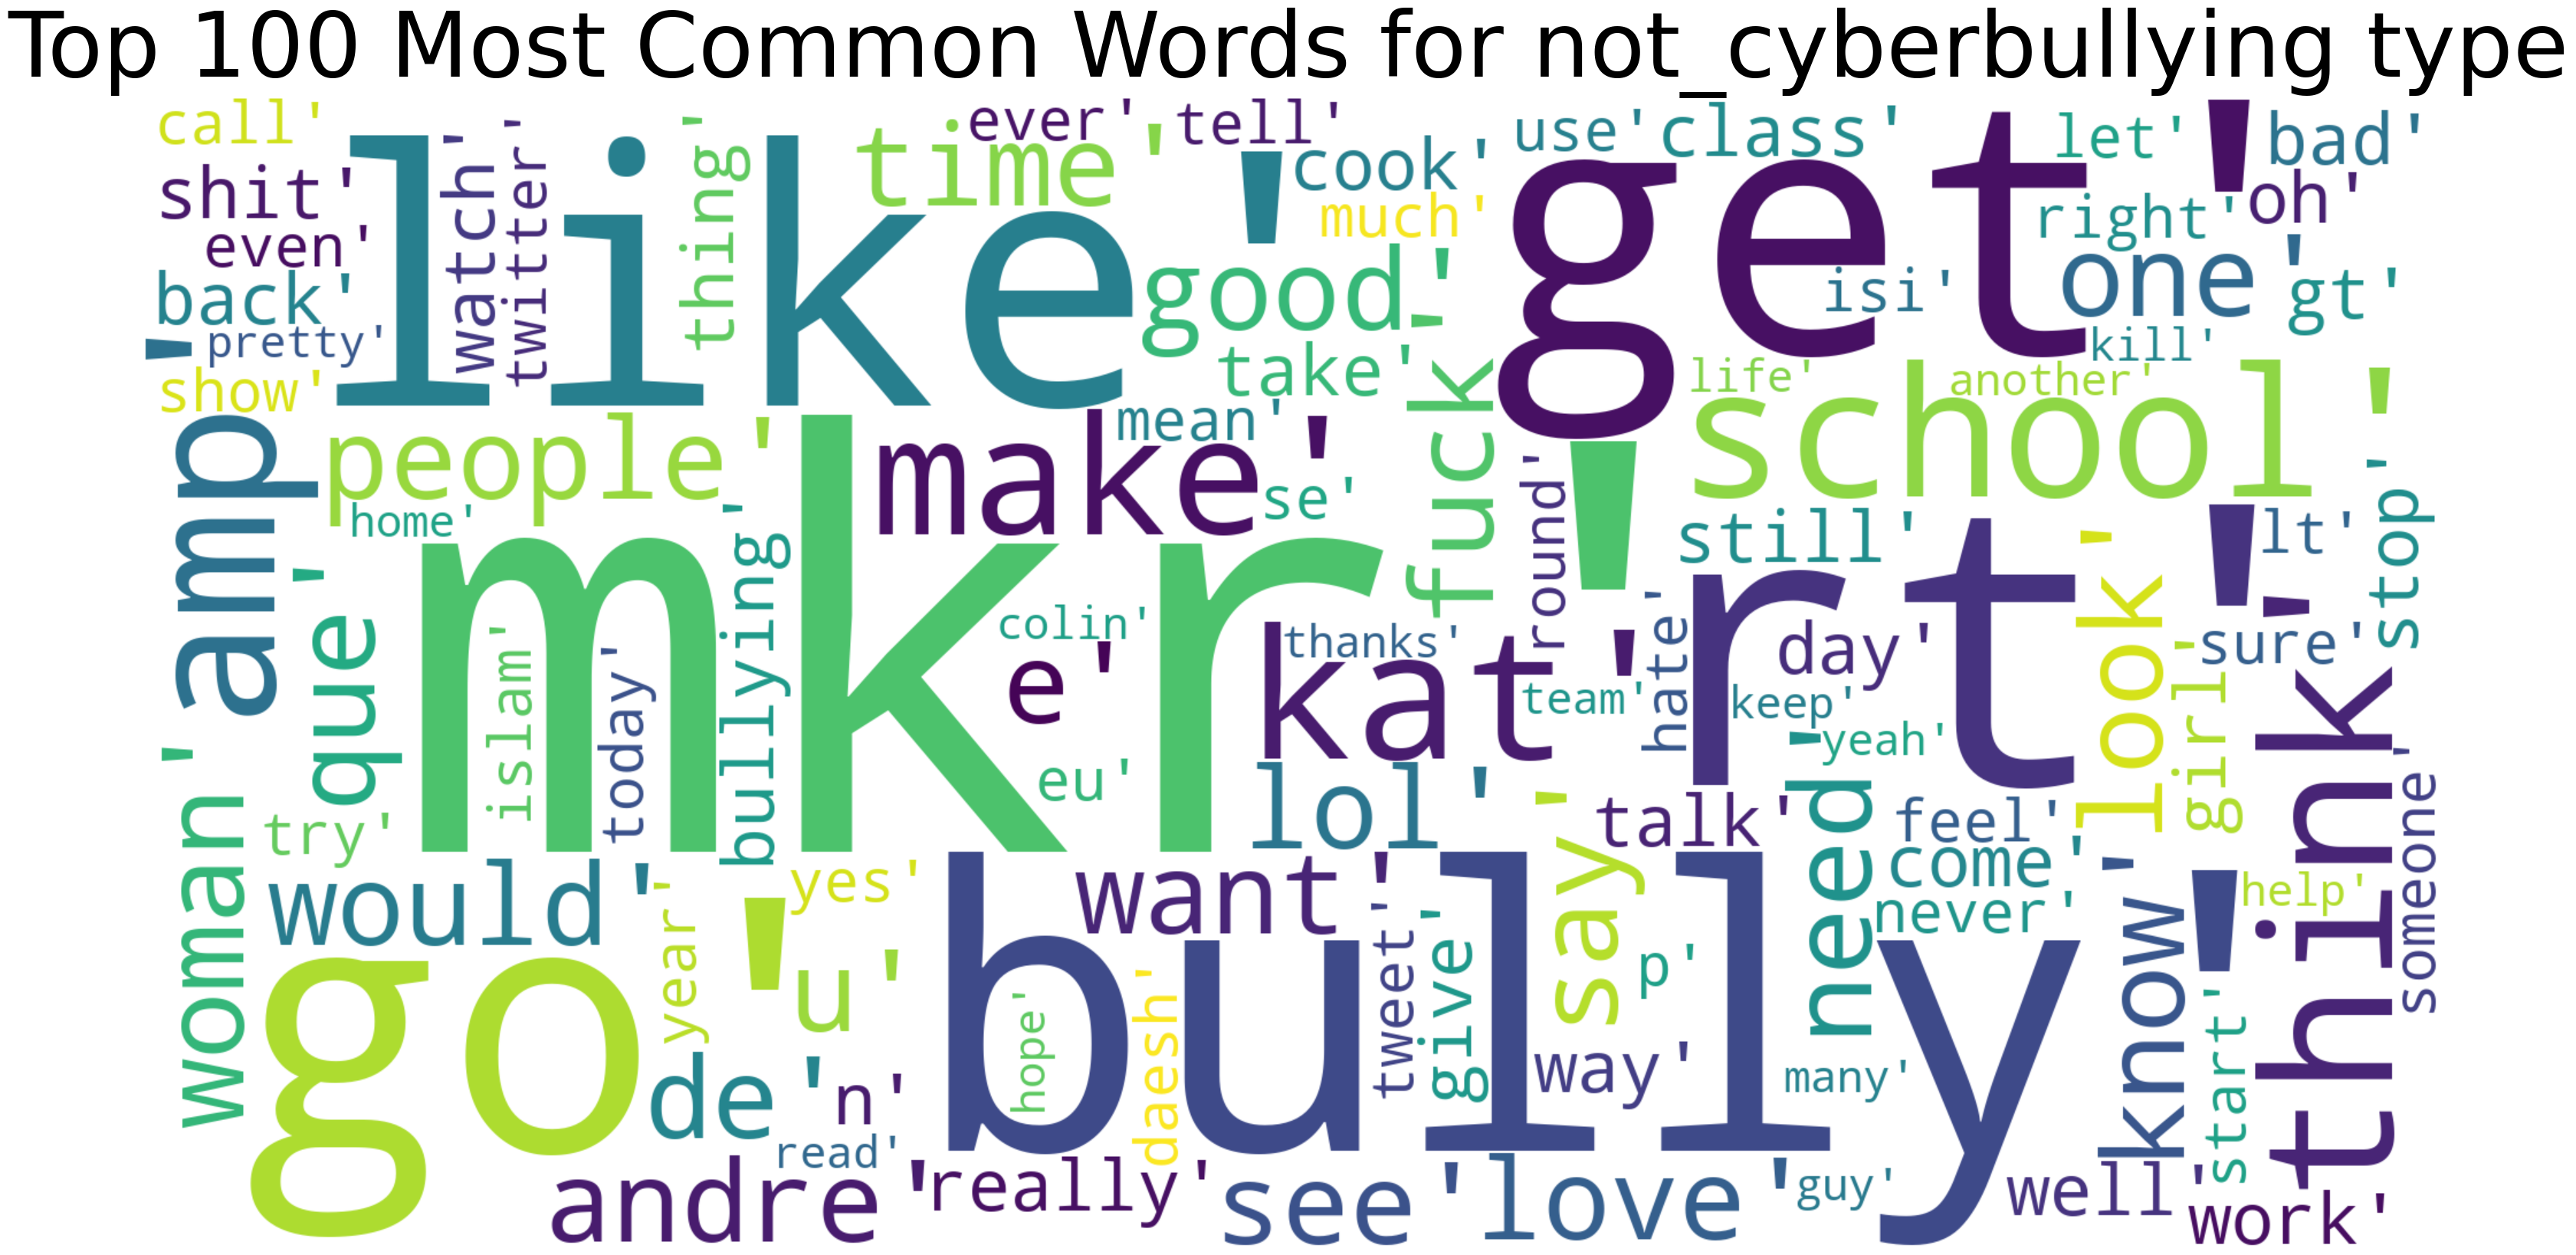

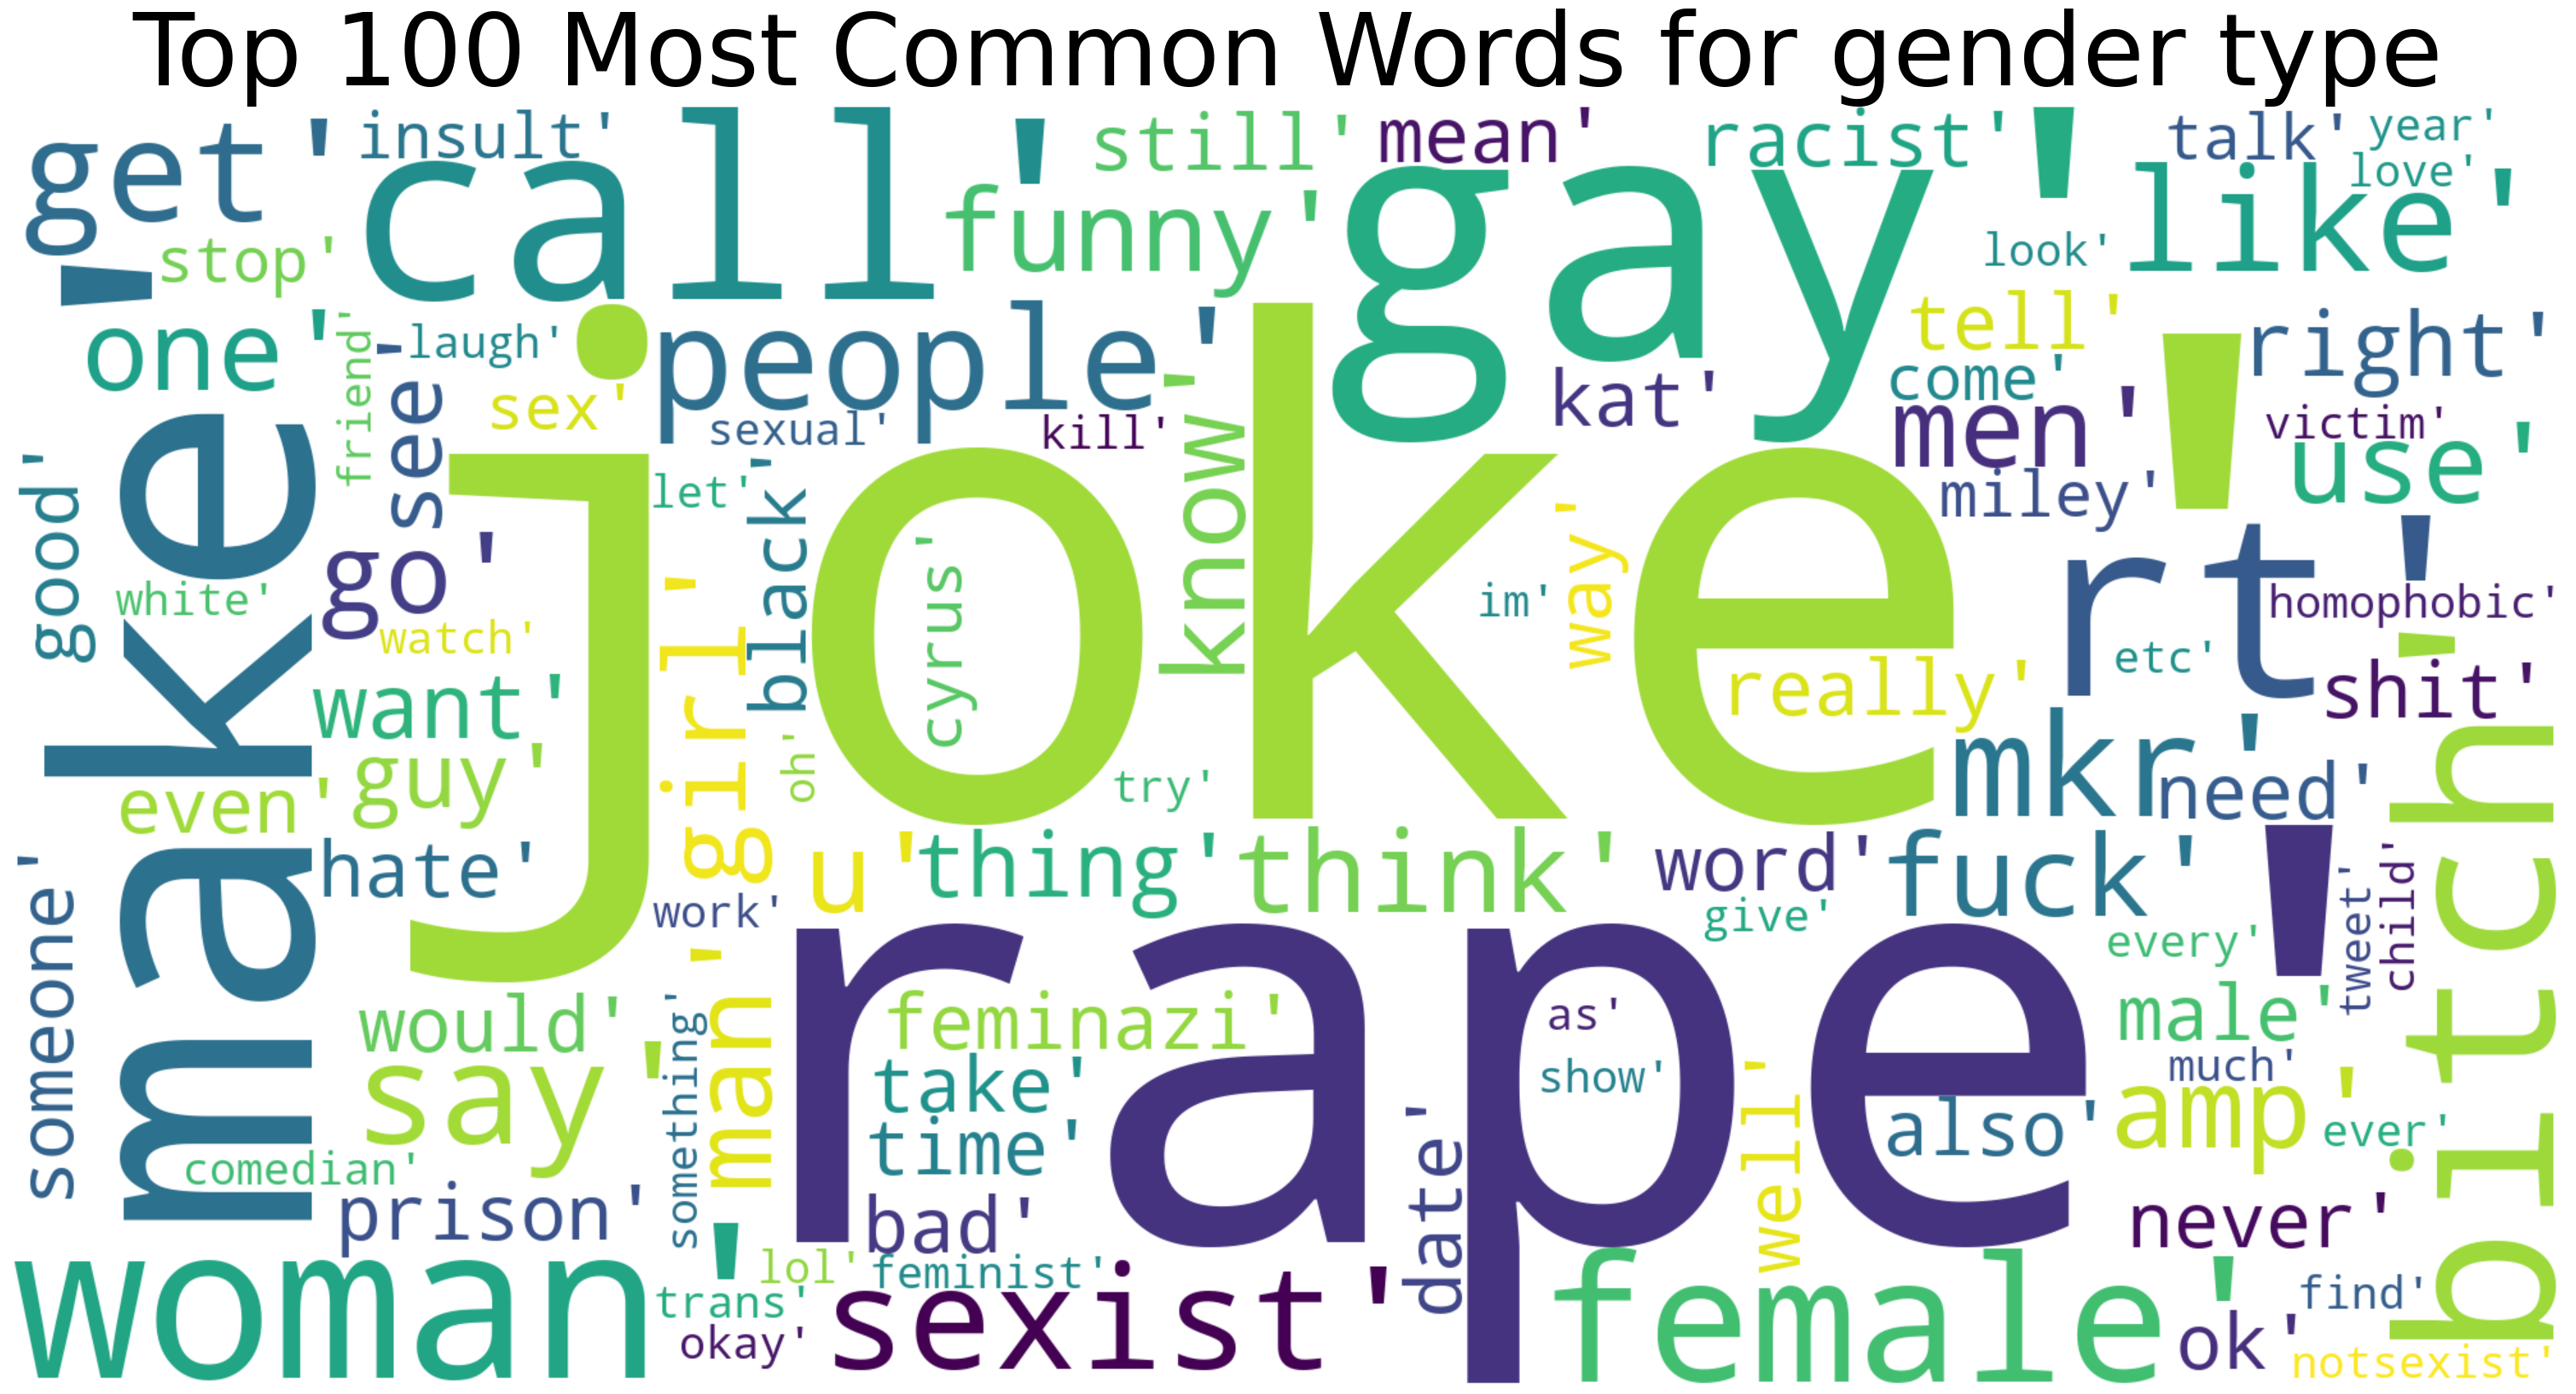

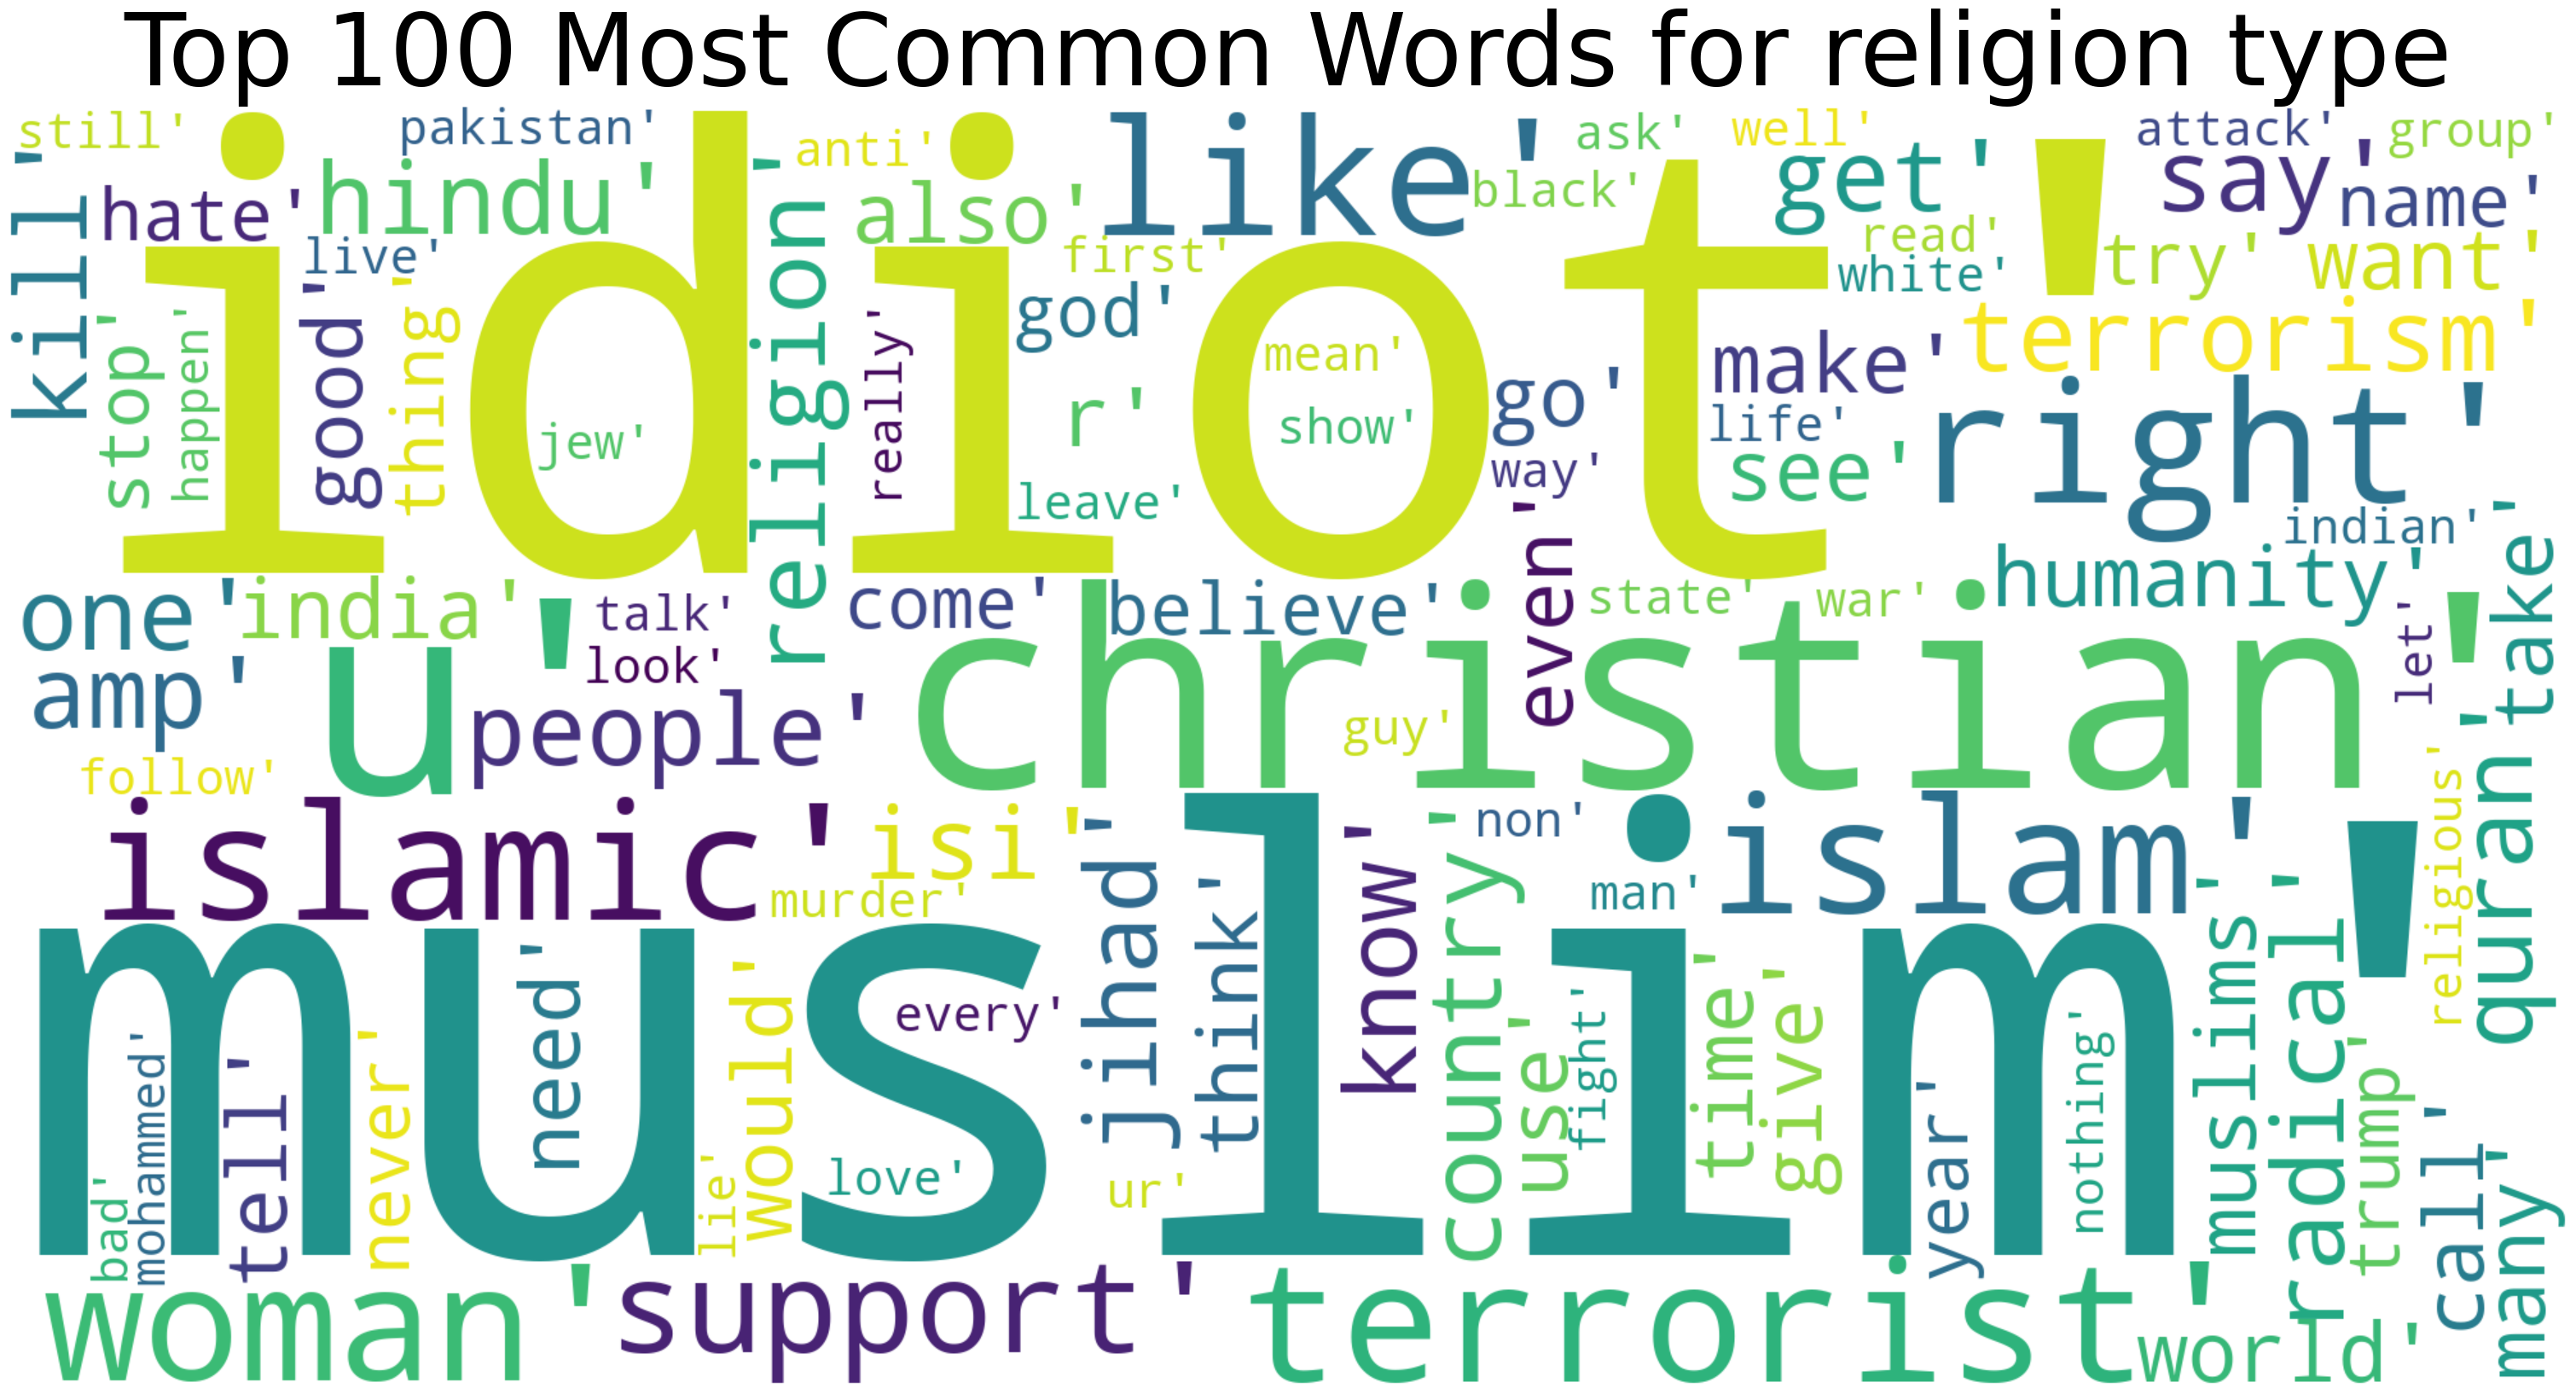

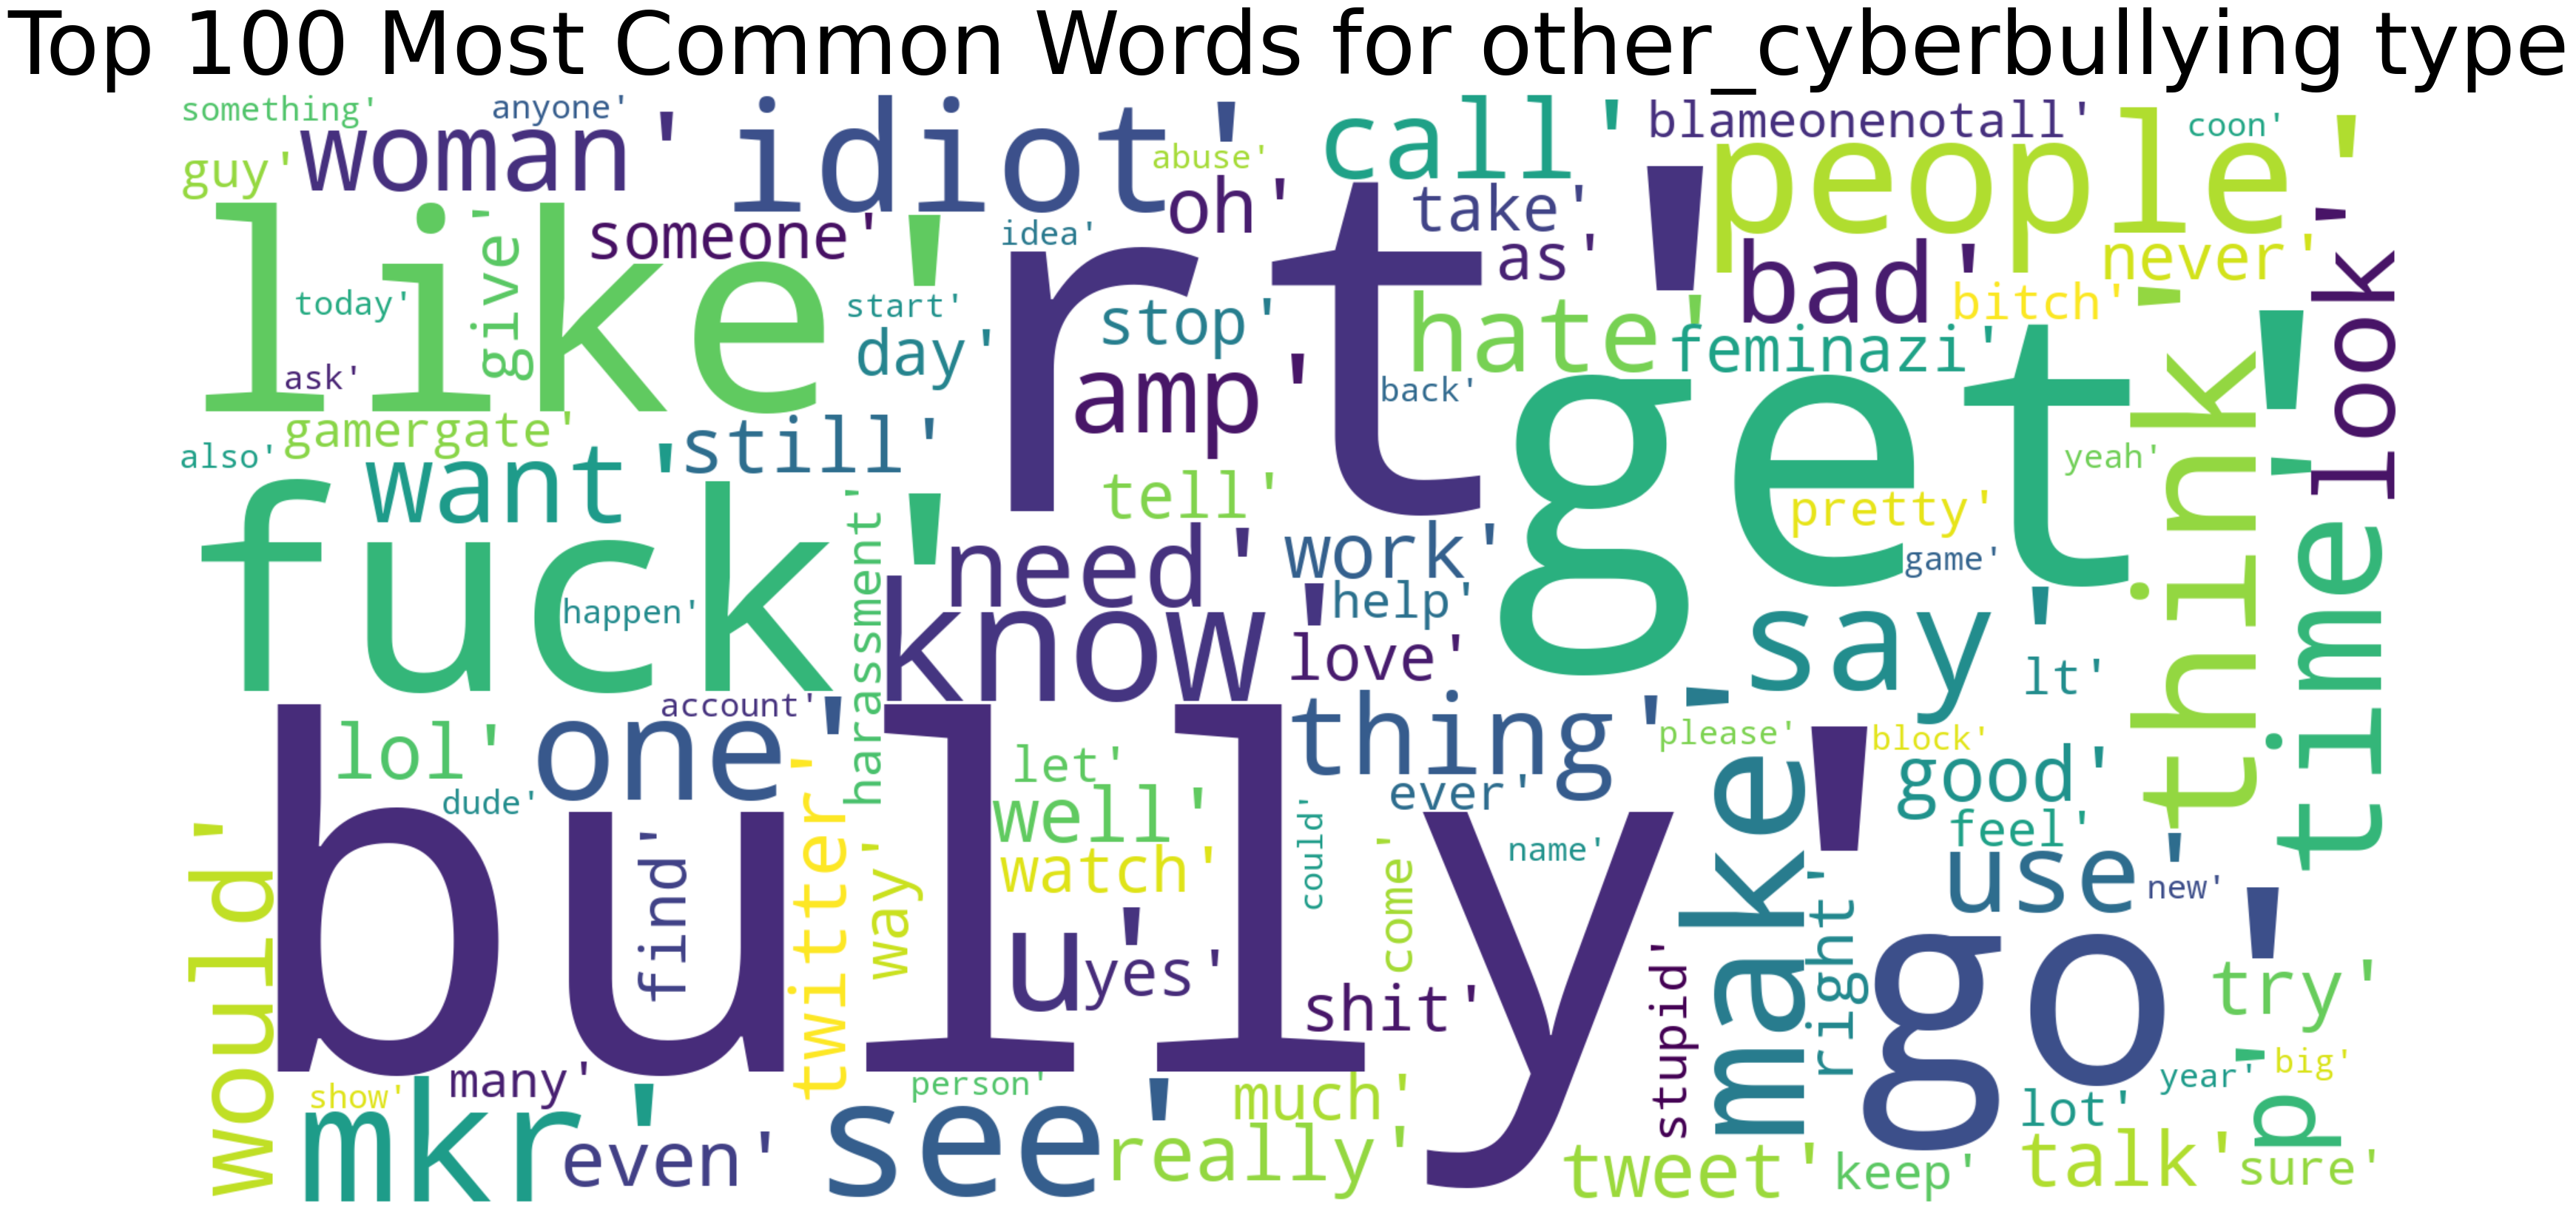

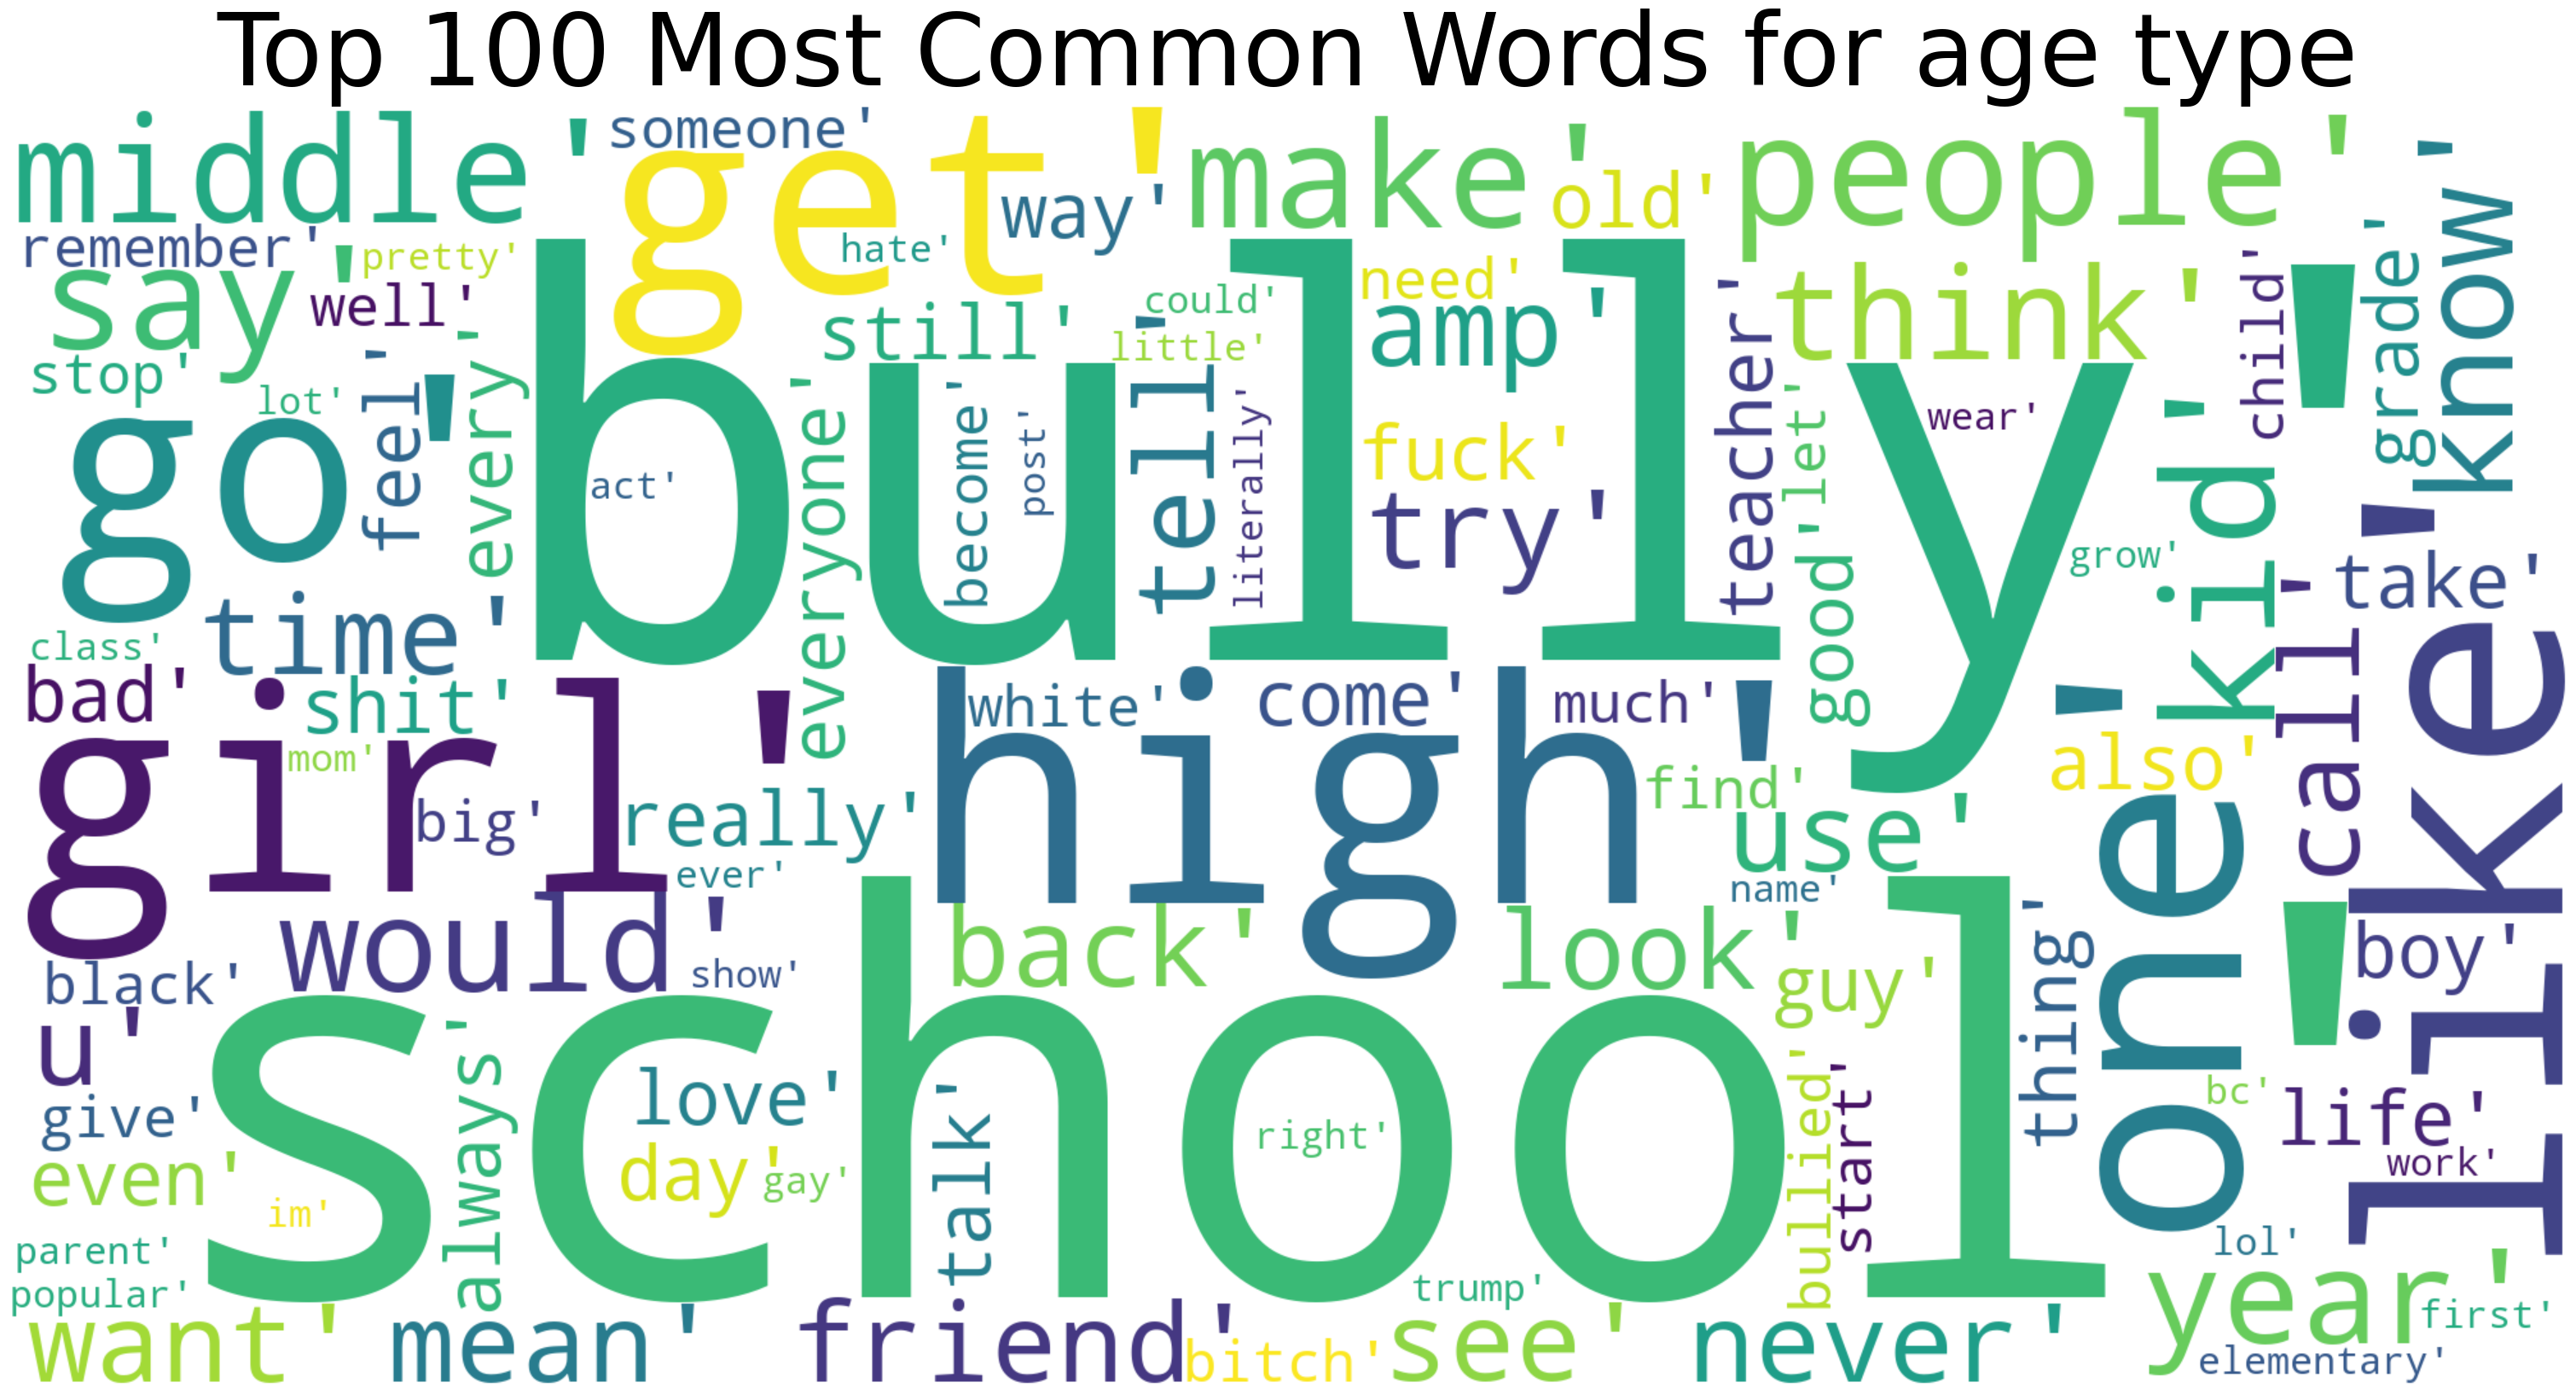

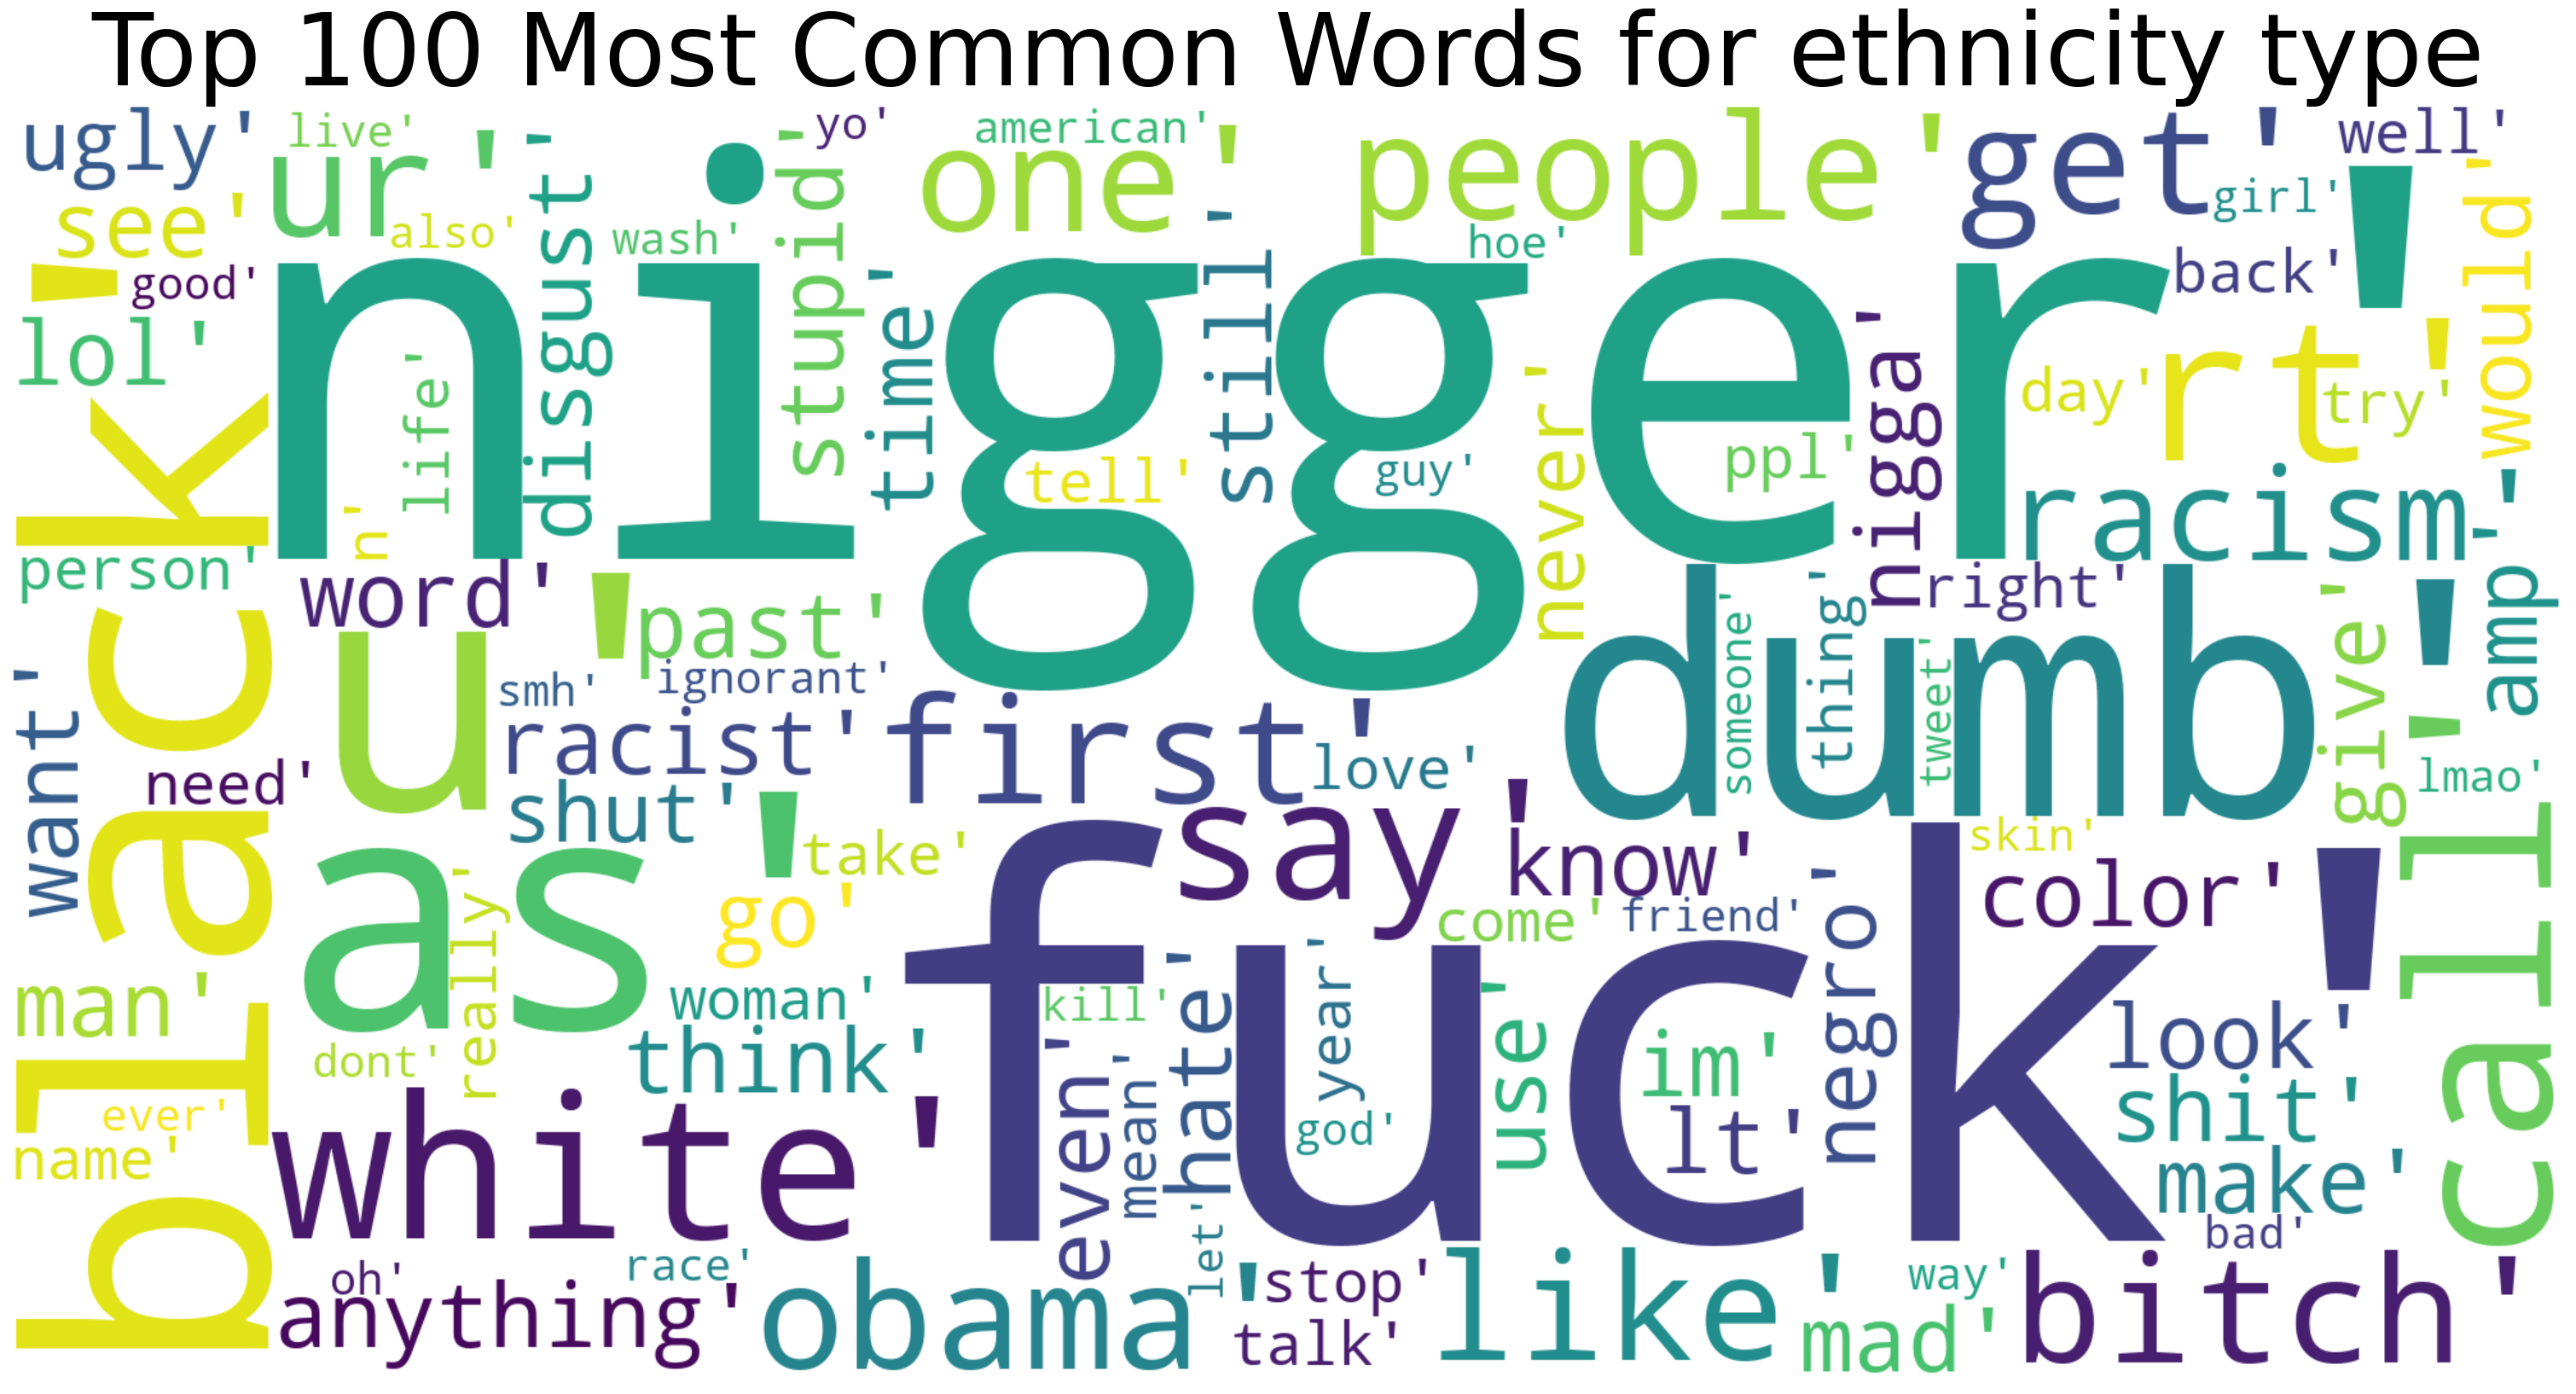

In [16]:
#plot the wordcloud for each of the cyberbullying type 
for type in df['cyberbullying_type'].unique(): 
    wordcloud(type)

In [17]:
#attempt to categorize other_cyberbullying 
from collections import Counter

#obtain the other_cyberbullying from the df and combine into a single string
other_cyberbullying = df[df['cyberbullying_type'] == 'other_cyberbullying']['lemma_str']
other_cyberbullying_combined_text = ' '.join(other_cyberbullying)
other_cyberbullying_words = other_cyberbullying_combined_text.split()

#use counter to count the words in other_cyberbullying words
others_counts = Counter(other_cyberbullying_words)
others_common_words = others_counts.most_common(100) 

#use a for loop to get the 50 most common words
for word in others_common_words:
    print(f'Word: {word}')

Word: ('rt', 891)
Word: ('bully', 891)
Word: ('get', 694)
Word: ('fuck', 508)
Word: ('like', 492)
Word: ('go', 438)
Word: ('people', 429)
Word: ('think', 347)
Word: ('know', 346)
Word: ('make', 334)
Word: ('mkr', 304)
Word: ('see', 275)
Word: ('idiot', 260)
Word: ('time', 259)
Word: ('say', 259)
Word: ('one', 259)
Word: ('u', 257)
Word: ('thing', 238)
Word: ('need', 227)
Word: ('woman', 221)
Word: ('p', 220)
Word: ('would', 220)
Word: ('want', 219)
Word: ('bad', 212)
Word: ('use', 211)
Word: ('call', 210)
Word: ('amp', 203)
Word: ('look', 199)
Word: ('hate', 194)
Word: ('really', 192)
Word: ('good', 189)
Word: ('talk', 187)
Word: ('twitter', 179)
Word: ('oh', 168)
Word: ('tweet', 167)
Word: ('lol', 166)
Word: ('still', 165)
Word: ('work', 165)
Word: ('well', 164)
Word: ('try', 157)
Word: ('even', 155)
Word: ('feminazi', 153)
Word: ('someone', 150)
Word: ('tell', 148)
Word: ('take', 146)
Word: ('stop', 143)
Word: ('love', 140)
Word: ('never', 137)
Word: ('as', 132)
Word: ('way', 129)
Wo

The words seem to be a combination of words related to online interactions for 'other-cyberbullying'

Multiclass Classification (Naive Bayes/Random Forest/Gradient Boosting)

In [18]:
#import the require libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve





In [19]:
#encode the categorical value into numerical values 
encoder = LabelEncoder()
df['cyber_encode'] = encoder.fit_transform(df['cyberbullying_type'])
print(df['cyber_encode'])

0        3
1        3
2        3
3        3
4        3
        ..
47687    1
47688    1
47689    1
47690    1
47691    1
Name: cyber_encode, Length: 47692, dtype: int64


In [20]:
#create train test split  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['lemma_str'], df['cyber_encode'], test_size=0.2, random_state=42)


In [21]:
#convert lemmantize data into numerical feature 
vectorizer = TfidfVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)




In [22]:
#create the naive bayes model
multi_model = MultinomialNB()

#define the hyperparameter 
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

#perform cross validation with grid search
multi_search = GridSearchCV(multi_model, param_grid, cv=5)
multi_search.fit(X_train_vector, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0], 'fit_prior': [True, False]})

In [23]:
#obtain the best parameter and the best model 
multi_best_params = multi_search.best_params_
multi_best_model = multi_search.best_estimator_

#predict the model
y_pred = multi_best_model.predict(X_test_vector)

#evaluate the performance of the model through report 
print(f'Naive Bayes Model Report ')
print(classification_report(y_test,y_pred))

Naive Bayes Model Report 
              precision    recall  f1-score   support

           0       0.70      0.97      0.81      1603
           1       0.82      0.90      0.86      1603
           2       0.81      0.83      0.82      1531
           3       0.66      0.37      0.47      1624
           4       0.59      0.44      0.51      1612
           5       0.80      0.96      0.87      1566

    accuracy                           0.74      9539
   macro avg       0.73      0.75      0.72      9539
weighted avg       0.73      0.74      0.72      9539



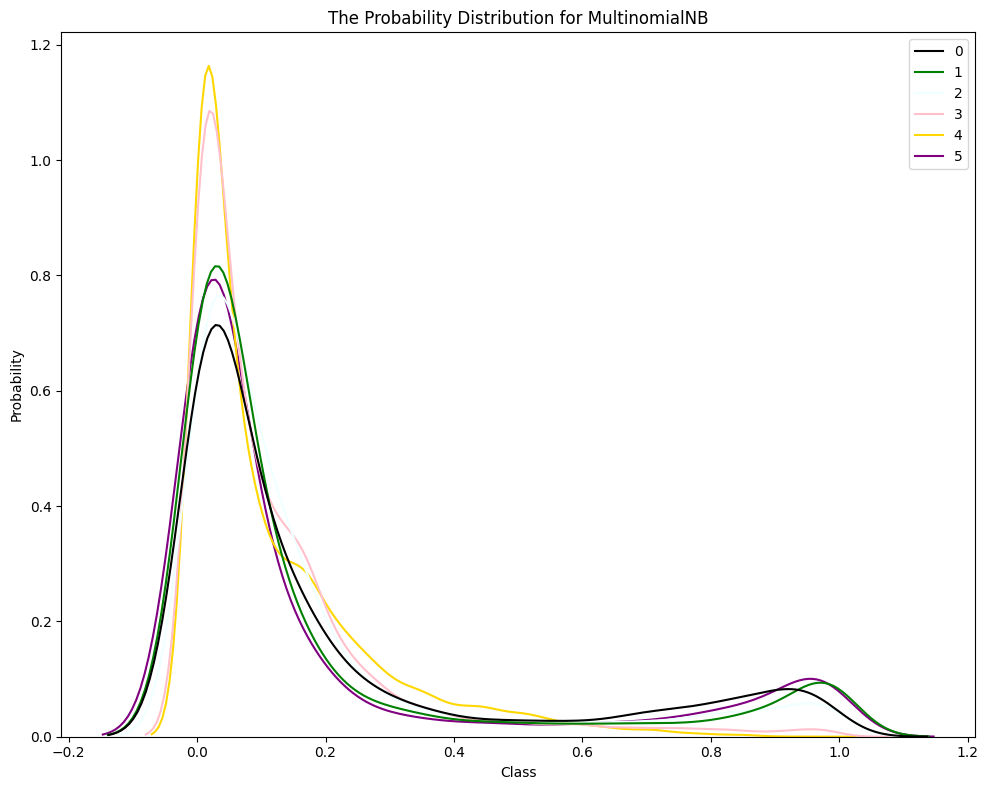

In [24]:
#create a probability distribution for the naive bayes model 
multi_prob_dist = multi_best_model.predict_proba(X_test_vector)

color = ['black','green','azure','pink','gold','purple']

#plot the probability distribution 
plt.figure(figsize=(10, 8))
sns.kdeplot(data=multi_prob_dist, palette=color)
plt.title('The Probability Distribution for MultinomialNB')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

In [25]:
#create the random forest model and fit to training data 
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vector, y_train)

#predict the labels for testing data 
y_pred = rf_model.predict(X_test_vector)

#evaluate the performance of the model through report 
print(f'Random Forest Model Report ')
print(classification_report(y_test,y_pred))

Random Forest Model Report 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1603
           1       0.99      0.98      0.98      1603
           2       0.89      0.83      0.86      1531
           3       0.57      0.49      0.53      1624
           4       0.54      0.65      0.59      1612
           5       0.95      0.96      0.96      1566

    accuracy                           0.81      9539
   macro avg       0.82      0.81      0.82      9539
weighted avg       0.82      0.81      0.81      9539



/Users/jc/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


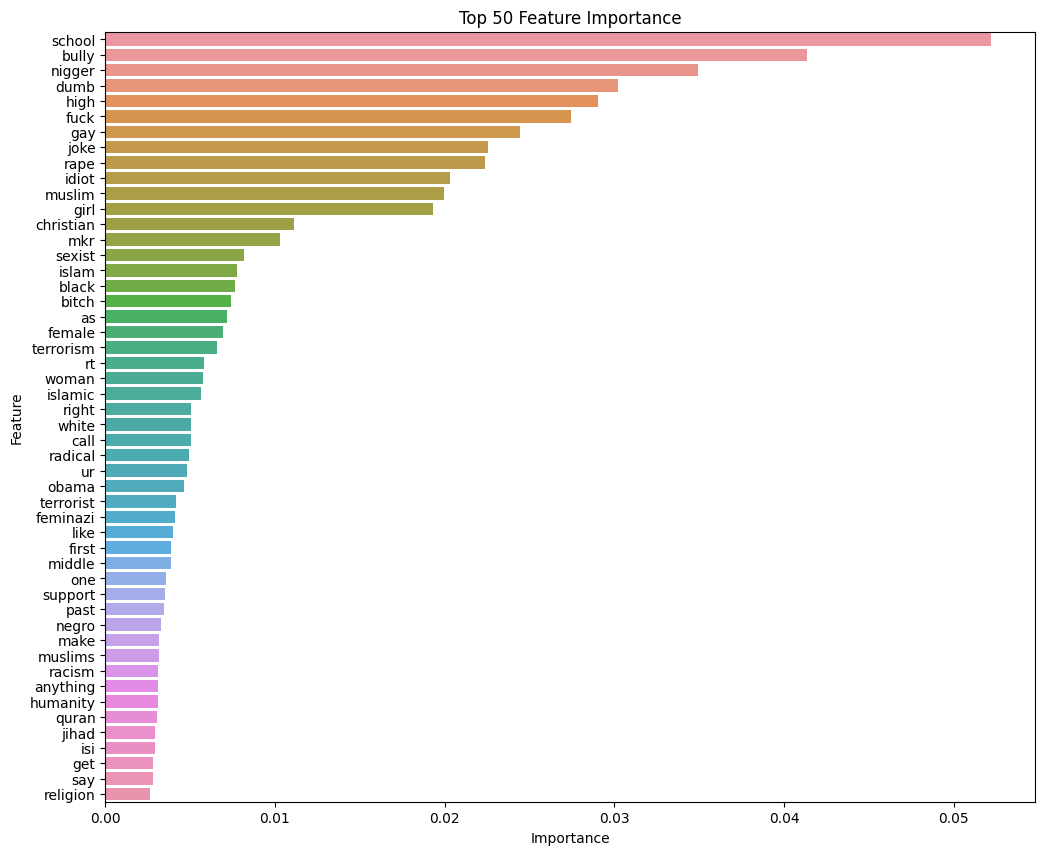

In [26]:
#determine the feature importances of the rf_model
rf_features = rf_model.feature_importances_

#create a new df that consist of the feature and their importance scores 
rf_importances = pd.DataFrame({'Feature': vectorizer.get_feature_names(), 'Importance': rf_features})
rf_importances = rf_importances.sort_values(by='Importance', ascending=False)

#plot the top 50 words 
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=rf_importances[:50])
plt.title(f'Top {50} Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [27]:
#create the Gradient Boosting model and fit to training data
gradient_model = GradientBoostingClassifier()
gradient_model.fit(X_train_vector, y_train)

#predict the labels for testing data 
y_pred = gradient_model.predict(X_test_vector)

#evaluate the performance of the model through report 
print(f'Gradient Boosting Model Report ')
print(classification_report(y_test,y_pred))

Gradient Boosting Model Report 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1603
           1       0.99      0.97      0.98      1603
           2       0.91      0.82      0.86      1531
           3       0.72      0.39      0.51      1624
           4       0.55      0.89      0.68      1612
           5       0.97      0.93      0.95      1566

    accuracy                           0.83      9539
   macro avg       0.86      0.83      0.83      9539
weighted avg       0.85      0.83      0.83      9539



/Users/jc/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


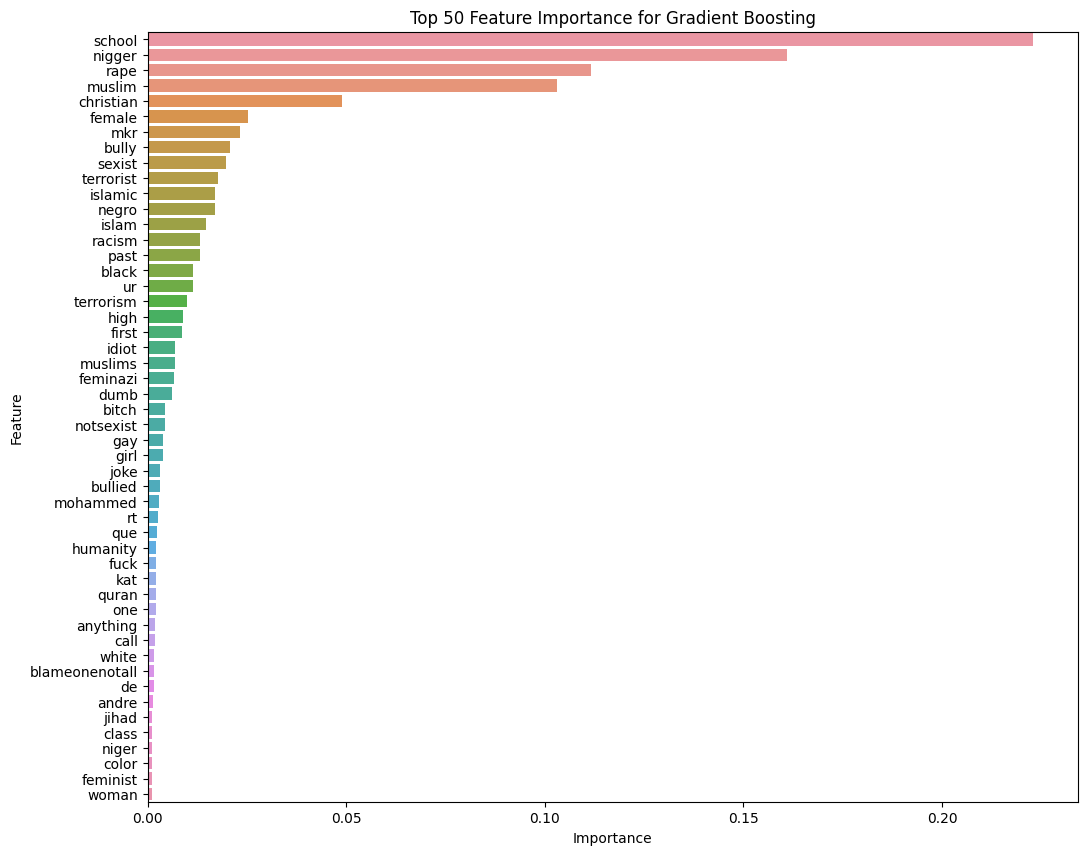

In [28]:
#obtain the feature importances for gradient_model
gradient_feature = gradient_model.feature_importances_

#create the dataframe with the features and their importance
gradient_importance = pd.DataFrame({'Feature': vectorizer.get_feature_names(), 'Importance': gradient_feature})
gradient_importance = gradient_importance.sort_values(by='Importance', ascending=False)


#plot the top 50 words
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=gradient_importance[:50])
plt.title(f'Top {50} Feature Importance for Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The metrics use to evaluate the multiclass classification models were accuracy (macro accuracy), precision, and recall. 

Of the models Naive Bayes perform the worst with a macro accuracy of 0.72. The range of precision was from 0.59 - 0.82. While the range for recall was 0.37 - 0.97. 

The model that perform the best was Gradient Boosting. This might be because of its advance ensemble learning technique (boosting). It have an macro accuracy of 0.83. The range for precision was 0.55-0.99. While the range for recall was 0.39 - 0.97.

Overall the Gradient Boosting obtain a higher/max score for precision, recall, and macro accuracy of the 3 model

Binary Classification (SVM, Logistic Regression)

In [29]:
#divide the dataset into cyberbullying and not_cyberbullying
def split_data(row):
    cyberbullying = ['religion','age','gender','other_cyberbullying','ethnicity']
    if row['cyberbullying_type'] in cyberbullying:
        return 1 
    else:
        return 0
    
#apply the function and check if it successful
df['binary_encode'] = df.apply(split_data,axis=1)
df.head()


tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                         clean_tweet  \
0  In other words  katandandre  your food was cra...   
1  Why is  aussietv so white   MKR  theblock  ImA...   
2       a classy whore  Or more red velvet cupcakes    
3    meh   P  thanks for the heads up  but not to...   
4    This is an ISIS account pretending to be a K...   

                                   clean_tweet_token  \
0  [in, other, words, , katandandre, , your, food...   
1  [why, is, , aussietv, so, white, , , mkr, , th...   
2  [, , a, classy, whore, , or, more, red, velvet...   
3  [, , meh, , , p, , thanks, for, the, heads, up...   
4  [, , this, is, an, isis, account, pretending, ...   

                                clean_tweet_stopword  \
0  [words, , katandandre, , food, crapilicious, ,...   
1  [, aussietv, white, , , mkr, , theblock, , ima...   
2     [, , classy, whore, , red, velvet, cupcakes, ]   
3  [, , meh, , , p, , thanks, heads, , concerned,...   
4  [, , isis, account, pretending, kurdish, accou...   

                                        tweet_speech  \
0  [(words, NNS), (, VBP), (katandandre, JJ), (, ...   
1  [(, JJ), (aussietv, JJ), (white, JJ), (, NN), ...   
2  [(, JJ), (, NNP), (classy, NN), (whore, NN), (...   
3  [(, JJ), (, NNP), (meh, NN), (, NNP), (, NNP),...   
4  [(, JJ), (, JJ), (isis, NN), (account, NN), (p...   

                                       tweet_wordnet  \
0  [(words, n), (, v), (katandandre, a), (, n), (...   
1  [(, a), (aussietv, a), (white, a), (, n), (, n...   
2  [(, a), (, n), (classy, n), (whore, n), (, n),...   
3  [(, a), (, n), (meh, n), (, n), (, n), (p, n),...   
4  [(, a), (, a), (isis, n), (account, n), (prete...   

                                     tweet_lemantize  \
0  [word, , katandandre, , food, crapilicious, , ...   
1  [, aussietv, white, , , mkr, , theblock, , ima...   
2      [, , classy, whore, , red, velvet, cupcake, ]   
3  [, , meh, , , p, , thanks, head, , concern, an...   
4  [, , isi, account, pretend, kurdish, account, ...   

                                           lemma_str  sentiment  cyber_encode  \
0         word  katandandre  food crapilicious   mkr       0.00             3   
1   aussietv white   mkr  theblock  imacelebritya...       0.00             3   
2                  classy whore  red velvet cupcake        0.05             3   
3    meh   p  thanks head  concern another angry ...      -0.15             3   
4    isi account pretend kurdish account   like i...       0.00             3   

   binary_encode  
0              0  
1              0  
2              0  
3              0  
4              0

In [51]:
#split data into training and testing set
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(df['lemma_str'], df['binary_encode'], test_size=0.2, random_state=42)

#convert the feature into numerical values  
vectorizer = TfidfVectorizer()
X_train_vector_bin = vectorizer.fit_transform(X_train_binary)
X_test_vector_bin = vectorizer.transform(X_test_binary)




In [53]:
#create the svm_model model and fit to training data
svm_model = SVC(C=1.0,kernel='linear',random_state=42)
svm_model.fit(X_train_vector_bin, y_train_binary)

#predict the label for testing data
svm_model_y_pred = svm_model.predict(X_test_vector_bin)

#evaluate the performance of the model through report 
print(f'svm_model Model Report ')
print(classification_report(y_test_binary,svm_model_y_pred))


svm_model Model Report 
              precision    recall  f1-score   support

           0       0.70      0.36      0.48      1624
           1       0.88      0.97      0.92      7915

    accuracy                           0.87      9539
   macro avg       0.79      0.67      0.70      9539
weighted avg       0.85      0.87      0.85      9539



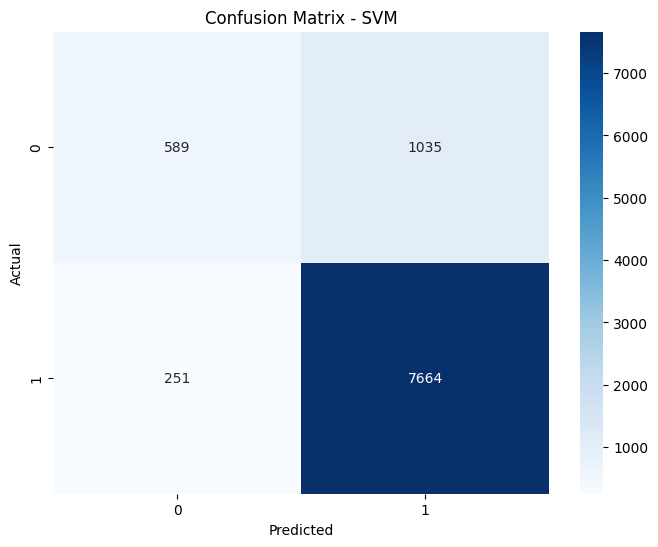

In [54]:
# Confusion Matrix
svm_confusion = confusion_matrix(y_test_binary, svm_model_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [55]:
#calculate sensitivty and specificity
TN = svm_confusion[0, 0]
FP = svm_confusion[0, 1]
FN = svm_confusion[1, 0]
TP = svm_confusion[1, 1]

svm_sensitivity = TP / (TP + FN)
svm_specificity = TN / (TN + FP)

print(f'Sensitivity Score is {svm_sensitivity}')
print(f'Specificity score is {svm_specificity}')


Sensitivity Score is 0.9682880606443461
Specificity score is 0.3626847290640394


In [65]:
#create the logistic log_reg_model and fit the training data 
log_reg_model = LogisticRegression(penalty='l1',C=1.0, solver='liblinear', random_state=42)
log_reg_model.fit(X_train_vector_bin, y_train_binary)

#predict the label for testing data 
log_reg_y_pred = log_reg_model.predict(X_test_vector_bin)

#evaluate the performance of the log_reg_model through report 
print(f'Logistic Regression Report ')
print(classification_report(y_test_binary, log_reg_y_pred))


Logistic Regression Report 
              precision    recall  f1-score   support

           0       0.75      0.35      0.48      1624
           1       0.88      0.98      0.93      7915

    accuracy                           0.87      9539
   macro avg       0.82      0.66      0.70      9539
weighted avg       0.86      0.87      0.85      9539



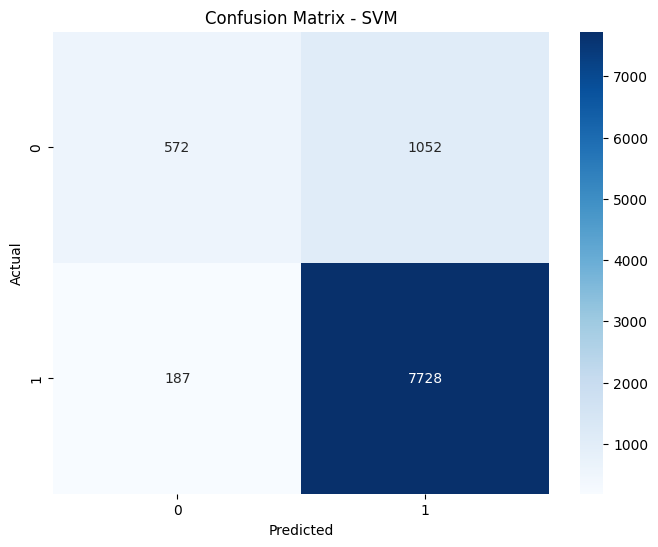

In [66]:
log_confusion = confusion_matrix(y_test_binary, log_reg_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(log_confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [67]:
#calculate sensitivty and specificity
TN = log_confusion[0, 0]
FP = log_confusion[0, 1]
FN = log_confusion[1, 0]
TP = log_confusion[1, 1]

log_sensitivity = TP / (TP + FN)
log_specificity = TN / (TN + FP)

print(f'Sensitivity Score is {log_sensitivity}')
print(f'Specificity score is {log_specificity}')


Sensitivity Score is 0.9763739734680985
Specificity score is 0.3522167487684729


Comparing sensitivity, specificity, f1 score, macro/weight avg - Logistic Regression perform better for Binary Classification